In [7]:
import dalex as dx
import pandas as pd
import pickle
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Data and models read

In [2]:
input_df = pd.read_csv('preprocessed_dataset.csv')
y = input_df.loc[:,'Attrition']
X = input_df.drop('Attrition', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [ ]:
lr = pickle.load(open( 'l1_log_reg.p', "rb" ))
lr_explainer = dx.Explainer(lr, X_train, y_train, label='Logistic Regresion')

In [ ]:
XGB = pickle.load(open( 'xgb_model.p', "rb" ))
XGB_explainer = dx.Explainer(XGB, X_train, y_train, label='XGBoost')

In [ ]:
RF = pickle.load(open( 'random_forest_model.p', "rb" ))
RF_explainer = dx.Explainer(RF, X_train, y_train, label='Random Forest')

# EDA

In [16]:
EDA_df = input_df.copy()

EDA_df.Attrition = EDA_df.applymap(lambda x: 'Odchodzacy' if x else 'Zostający').Attrition

In [41]:
EDA_df = pd.read_csv('BankChurners.csv')

EDA_df.drop('CLIENTNUM', axis=1, inplace=True)

EDA_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)

EDA_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

EDA_df.Attrition_Flag = EDA_df.applymap(lambda x: 'Odchodzacy' if x != "Existing Customer" else 'Zostający').Attrition_Flag

<AxesSubplot:>

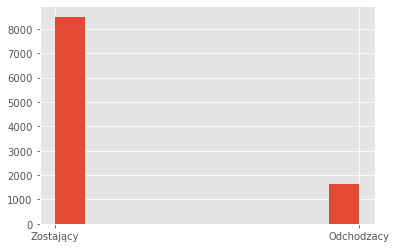

In [42]:
EDA_df.Attrition_Flag.hist()

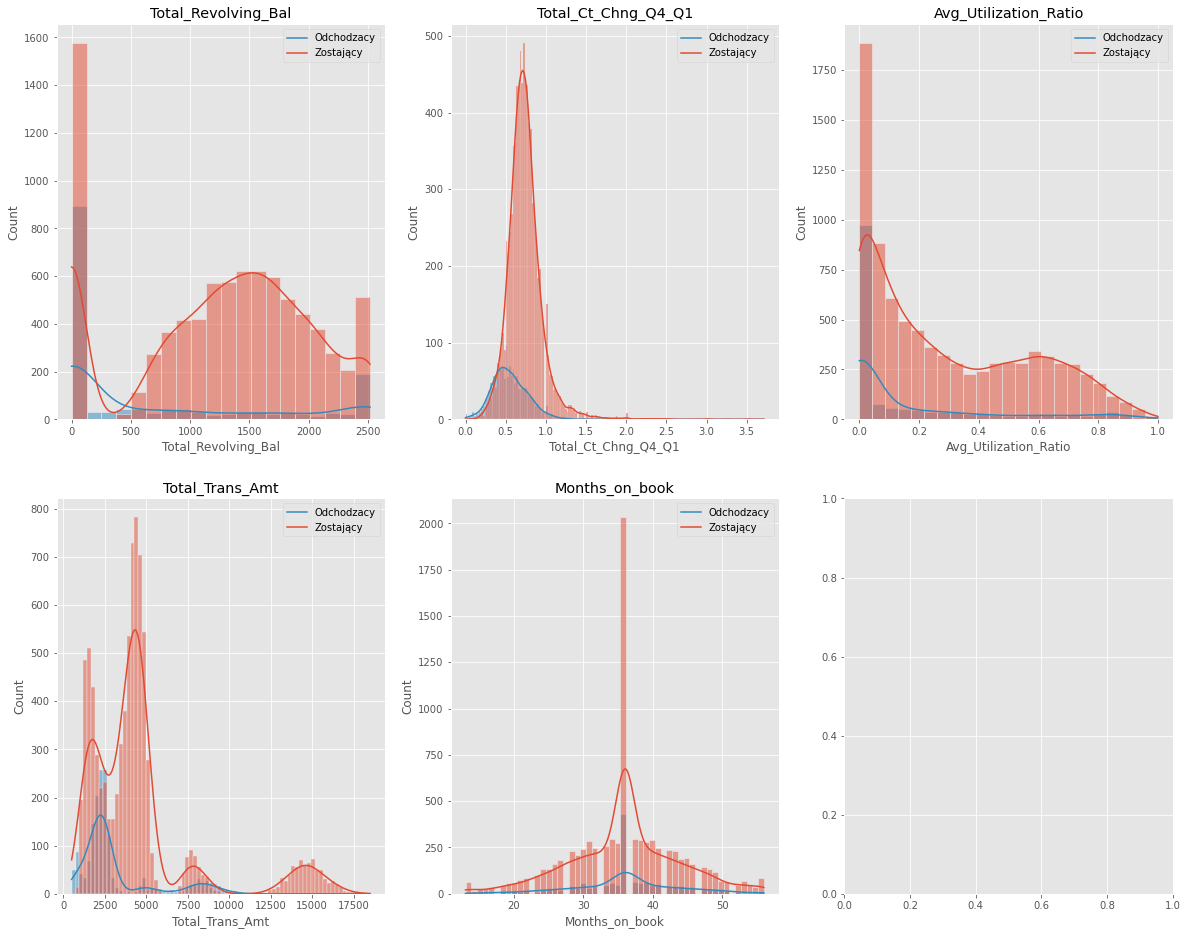

In [53]:
def plotHistPlotFlag(columns):
    fig, ax = plt.subplots(len(columns)//3+1, 3,figsize=(20, 16))
    
    index = 0
    for i in range(5):
        for j in range(3):
            if i*3+(j+1)>len(columns):
                break
            sns.histplot(data=EDA_df,
                         x=columns[index],
                         hue='Attrition_Flag',
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Odchodzacy', 'Zostający'])
            index += 1
            
#plotHistPlotFlag(['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
 #                 'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
  #                'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])
plotHistPlotFlag(['Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Months_on_book'])